In [12]:
import sys
import allel
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
sys.path.insert(0, '/home/jmurga/uabBioinformatics/session9/skCustomFunctions.py')
from skCustomFunctions import *

### Reading VCF files

In [3]:
vcf = allel.read_vcf(input='/home/jmurga/uabBioinformatics/session9/chr2_gp_lesson9.vcf.gz',fields='*',region='2:135792491-136822774',tabix='tabix')

In [4]:
vcf.keys()

dict_keys(['samples', 'calldata/GT', 'variants/AA', 'variants/AC', 'variants/AF', 'variants/AFR_AF', 'variants/ALT', 'variants/AMR_AF', 'variants/AN', 'variants/CHROM', 'variants/CIEND', 'variants/CIPOS', 'variants/CS', 'variants/DP', 'variants/EAS_AF', 'variants/END', 'variants/EUR_AF', 'variants/EX_TARGET', 'variants/FILTER_PASS', 'variants/ID', 'variants/IMPRECISE', 'variants/MC', 'variants/MEINFO', 'variants/MEND', 'variants/MLEN', 'variants/MSTART', 'variants/MULTI_ALLELIC', 'variants/NS', 'variants/POS', 'variants/QUAL', 'variants/REF', 'variants/SAS_AF', 'variants/SVLEN', 'variants/SVTYPE', 'variants/TSD', 'variants/VT', 'variants/altlen', 'variants/is_snp', 'variants/numalt'])

In [5]:
vcf = allel.read_vcf(input='/home/jmurga/uabBioinformatics/session9/chr2_gp_lesson9.vcf.gz',fields=['AA', 'AC', 'AF', 'AN', 'CHROM', 'POS', 'VT', 'REF', 'MULTI_ALLELIC', 'samples', 'GT', 'ALT', 'QUAL', 'DP', 'numalt'],region='2:135792491-136822774',tabix='tabix')

In [6]:
vcf.keys()

dict_keys(['samples', 'calldata/GT', 'variants/AA', 'variants/AC', 'variants/AF', 'variants/ALT', 'variants/AN', 'variants/CHROM', 'variants/DP', 'variants/MULTI_ALLELIC', 'variants/POS', 'variants/QUAL', 'variants/REF', 'variants/VT', 'variants/numalt'])

Get genotype from vcf file

In [7]:
gt = allel.GenotypeArray(vcf['calldata/GT'])

In [8]:
gt.shape

(27360, 2261, 2)

In [9]:
# Get the allel count from genotypes
ac = gt.count_alleles()
# Get the allele count calling for a matrix of variants and samples
gtAcArray = gt.to_allele_counts()
# Transform the genotype information to haplotypes
hap = gt.to_haplotypes()

Subset positions

In [15]:
vcf['variants/POS'] = np.sort(vcf['variants/POS'])

In [16]:
variantsIndex = allel.SortedIndex(vcf['variants/POS'])
# Check the index: print(variantsIndex)
selectedIndex = (variantsIndex > 135830967) & (variantsIndex < 135869682)
# Now subset the positions from the genotype array
gt[selectedIndex]

<GenotypeArray shape=(998, 2261, 2) dtype=int8>
0/0 0/0 0/0 0/0 0/0 ... 0/0 0/0 0/0 0/0 0/0
0/0 0/0 0/0 0/0 0/0 ... 0/0 0/0 0/0 0/0 0/0
0/0 0/0 0/0 0/0 0/0 ... 0/0 0/0 0/0 0/0 0/0
...
0/0 0/0 0/0 0/0 0/0 ... 0/0 0/0 0/0 0/0 0/0
0/0 0/0 0/0 0/0 0/0 ... 0/0 0/0 0/0 0/0 0/0
0/0 0/0 0/0 0/0 0/0 ... 0/0 0/0 0/0 0/0 0/0

In [25]:
# Check the index: print(variantsIndex)
selectedArray = vcf['calldata/GT'][(vcf['variants/POS'] > 135830967) & (vcf['variants/POS'] < 135869682)]
# Now subset the positions from the genotype array
allel.GenotypeArray(selectedArray)

<GenotypeArray shape=(998, 2261, 2) dtype=int8>
0/0 0/0 0/0 0/0 0/0 ... 0/0 0/0 0/0 0/0 0/0
0/0 0/0 0/0 0/0 0/0 ... 0/0 0/0 0/0 0/0 0/0
0/0 0/0 0/0 0/0 0/0 ... 0/0 0/0 0/0 0/0 0/0
...
0/0 0/0 0/0 0/0 0/0 ... 0/0 0/0 0/0 0/0 0/0
0/0 0/0 0/0 0/0 0/0 ... 0/0 0/0 0/0 0/0 0/0
0/0 0/0 0/0 0/0 0/0 ... 0/0 0/0 0/0 0/0 0/0

Segregating and biallelic variants

In [26]:
# Create the boolean filter using the genetic information
seg = ac.is_segregating()
bi = ac.is_biallelic_01()

In [27]:
print('Original number of variant',gt.shape)
print('Segregating variants',gt.compress(seg).shape)
print('Biallelic variants',gt.compress(bi).shape)

Original number of variant (27360, 2261, 2)
Segregating variants (26156, 2261, 2)
Biallelic variants (26029, 2261, 2)


Filtering by samples

In [28]:
npSamples = np.loadtxt('/home/jmurga/uabBioinformatics/session9/allPanel.txt', dtype='str',delimiter='\t')

In [29]:
npSamples

array([['HG00096', 'GBR', 'EUR', 'male'],
       ['HG00097', 'GBR', 'EUR', 'female'],
       ['HG00099', 'GBR', 'EUR', 'female'],
       ...,
       ['NA21141', 'GIH', 'SAS', 'female'],
       ['NA21143', 'GIH', 'SAS', 'female'],
       ['NA21144', 'GIH', 'SAS', 'female']], dtype='<U7')

In [30]:
afrFilter = npSamples[:,2] == 'AFR'
npSamplesFilter = npSamples[afrFilter]

In [31]:
## Boolean array of n shape to include all the variants without filtering
gtSubset = gt.subset(np.array(gt.shape[0]*[True]),afrFilter)

In [32]:
gtSubset

<GenotypeArray shape=(27360, 577, 2) dtype=int8>
0/0 0/0 1/0 1/0 0/1 ... 0/1 1/1 0/0 1/0 0/0
0/0 0/0 0/0 0/0 0/0 ... 0/0 0/0 0/0 0/0 0/0
0/0 0/0 0/0 0/0 0/0 ... 0/0 0/0 0/0 0/0 0/0
...
0/0 0/0 0/0 0/0 0/0 ... 0/0 0/0 0/0 0/0 0/0
0/0 0/0 0/0 0/0 0/0 ... 0/0 0/0 0/0 0/0 0/0
0/0 0/0 0/0 0/0 0/0 ... 0/0 0/0 1/0 0/0 0/0

### Basic nucleotide diversity measures

In [33]:
# Input variant count
bi = ac.is_biallelic_01()
onlyBiallelic = ac[bi]
# Input positions
pos = vcf['variants/POS']

In [34]:
D, windows, counts = allel.windowed_tajima_d(pos, ac, size=10000, step=10000,min_sites=1)

In [46]:
help(allel.windowed_watterson_theta)

Help on function windowed_watterson_theta in module allel.stats.diversity:

windowed_watterson_theta(pos, ac, size=None, start=None, stop=None, step=None, windows=None, is_accessible=None, fill=nan)
    Calculate the value of Watterson's estimator in windows over a single
    chromosome/contig.
    
    Parameters
    ----------
    
    pos : array_like, int, shape (n_items,)
        Variant positions, using 1-based coordinates, in ascending order.
    ac : array_like, int, shape (n_variants, n_alleles)
        Allele counts array.
    size : int, optional
        The window size (number of bases).
    start : int, optional
        The position at which to start (1-based).
    stop : int, optional
        The position at which to stop (1-based).
    step : int, optional
        The distance between start positions of windows. If not given,
        defaults to the window size, i.e., non-overlapping windows.
    windows : array_like, int, shape (n_windows, 2), optional
        Manually 

In [48]:
theta, windows, nbases, counts = allel.windowed_watterson_theta(pos, ac, size=10000, step=10000)

In [39]:
help(statisticsByWindows)

Help on function statisticsByWindows in module skCustomFunctions:

statisticsByWindows(positions, statisticValues, statisticName=None, title=None)
    Function to make an line chart representing statistics values by windows
    
    Parameters
    ----------
    positions: ndarray containing windows analyzed by scikit-allel
    statisticsValues: ndarray containing values calculated on genomic regions
    windowsSize: windows size analyzed 
    statiscticName: string to plot the statistic name analyzed
    title: string to plot a title
    Returns
    -------
    Line Chart



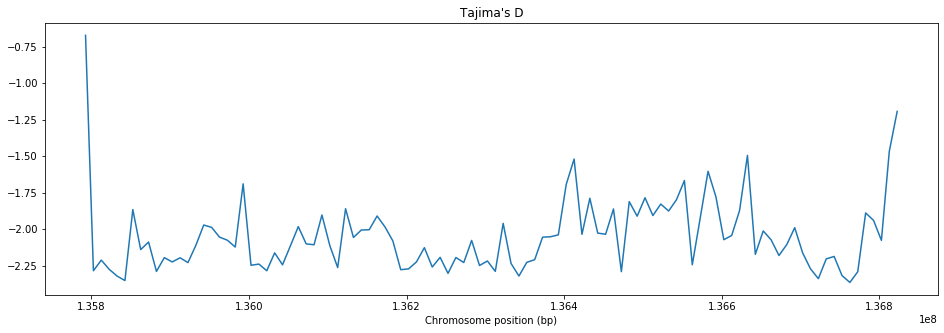

In [43]:
statisticsByWindows(positions=windows,statisticValues=D,title="Tajima's D")

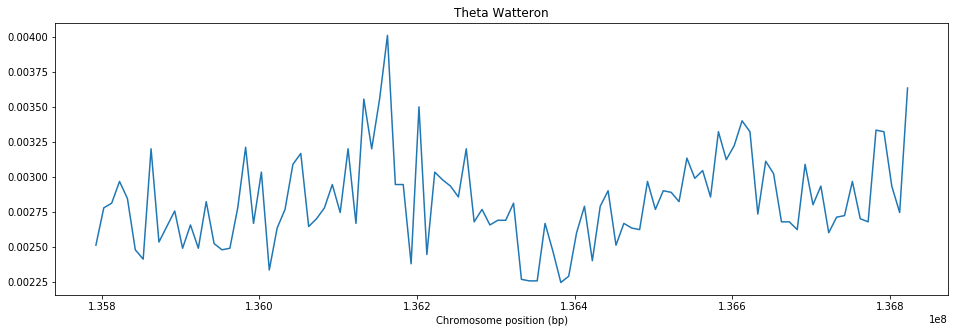

In [49]:
statisticsByWindows(positions=windows,statisticValues=theta,title="Theta Watteron")

### Principal Component Analysis

In [50]:
## Variables including genetic information
gt = allel.GenotypeArray(vcf['calldata/GT'])
ac = gt.count_alleles()
## Save variant positions and their index to filter later
posAll = allel.SortedIndex(vcf['variants/POS'])

In [52]:
npSamples = np.loadtxt('/home/jmurga/uabBioinformatics/session9//allPanel.txt', dtype='str',delimiter='\t')
sampleSelection = (npSamples[:,1] == 'CHB') | (npSamples[:,1] == 'CEU') | (npSamples[:,1] == 'YRI')
gtSubset = gt.subset(np.array(gt.shape[0]*[True]),sampleSelection)
# Redefine ac with the new genotypes values
ac = gtSubset.count_alleles()

In [54]:
# Filter to include genotypes and ac values which ATL is greater than 1
flt = (ac.is_biallelic_01()) & (ac[:,:2].min(axis=1) > 1)
gf = gtSubset.compress(flt, axis=0)

In [55]:
gn = gf.to_n_alt()

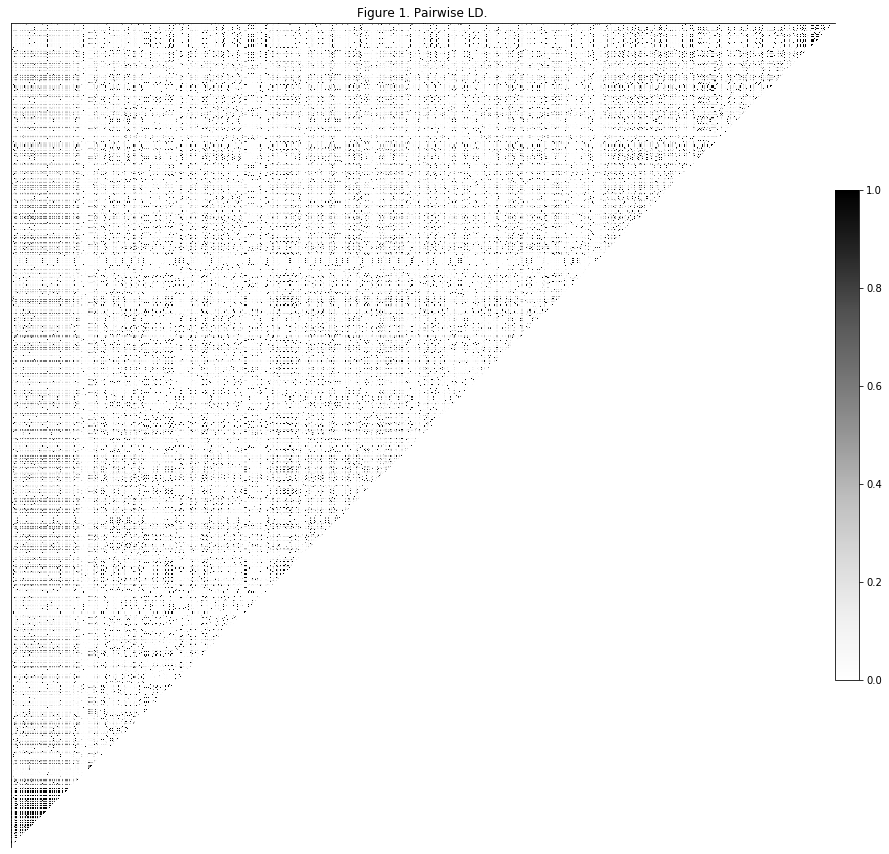

In [56]:
plotLd(gn[:1000], 'Figure 1. Pairwise LD.')

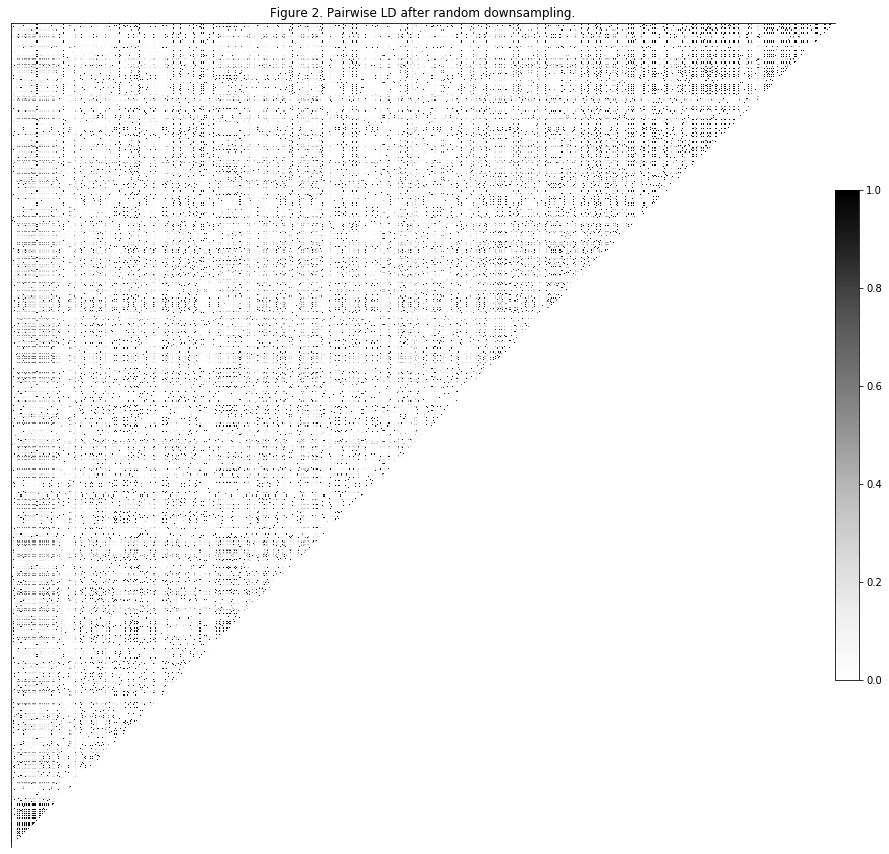

In [57]:
# number of SNPs to choose randomly
n = 5000  
vidx = np.random.choice(gn.shape[0], n, replace=False)
vidx.sort()
gnr = gn.take(vidx, axis=0)
plotLd(gnr[:1000], 'Figure 2. Pairwise LD after random downsampling.')

In [58]:
gnu = ldPrune(gn, size=500, step=200, threshold=.1, n_iter=2)

iteration 1 retaining 819 removing 5433 variants
iteration 2 retaining 222 removing 597 variants


In [59]:
coords1, model1 = allel.pca(gnu, n_components=10, scaler='patterson')

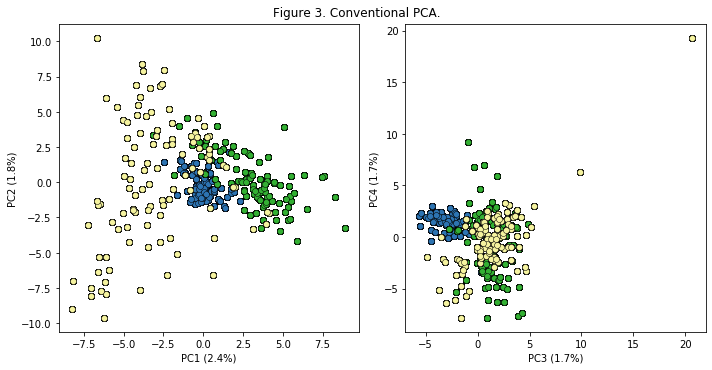

In [60]:
populations = npSamples[(npSamples[:,1] == 'CHB') | (npSamples[:,1] == 'CEU') | (npSamples[:,1] == 'YRI')][:,1]
figPca(coords1, model1, 'Figure 3. Conventional PCA.',populations)

Integrated Haplotype Score